# <center>Analyse des données pour un organisme de santé publique</center>

Mission pour l'amélioration de la base de données Open Food Facts    

**<u>Contexte</u>** :
L'agence Santé publique France a sollicité les services de notre entreprise pour améliorer la base de données Open Food Facts, une base de données open source qui permet aux particuliers et aux organisations d'accéder à la qualité nutritionnelle des produits. Cette base est essentielle pour évaluer les produits alimentaires, mais son utilisation peut être complexifiée par la nécessité de remplir de nombreux champs, ce qui augmente les risques d'erreurs de saisie et de valeurs manquantes.

**<u>Objectif du projet</u>** :
L'objectif principal est de créer un système de suggestion ou d'auto-complétion afin d'aider les utilisateurs à remplir les champs de la base de données de manière plus efficace. Avant de développer cette application, la première étape consiste à prendre en main, nettoyer et explorer les données existantes pour évaluer la faisabilité de cette solution.

**<u>Votre rôle</u>** :
Vous êtes chargé du nettoyage et de l'exploration des données, une étape cruciale pour poser les bases de la future application. Cette mission comprend plusieurs étapes :

**<u>Traitement du jeu de données</u>** :

Sélection des variables pertinentes pour la suggestion de valeurs manquantes.    

- 1 Nettoyage des données :    
identification des valeurs manquantes et aberrantes, et mise en place de méthodes adaptées pour leur traitement.
Automatisation des traitements afin de rendre le programme adaptable à de légères modifications de la base de données.    

- 2 Analyse des données :    
Visualisation des données pour une meilleure compréhension.
Analyse univariée des variables sélectionnées, en utilisant des graphiques variés pour illustrer les résultats.
Analyse multivariée pour la création ou la sélection de nouvelles variables, accompagnée de tests statistiques pour valider les résultats.    

- 3 Rédaction et présentation :    
Rédaction d'un rapport détaillant les résultats de l'exploration des données et la faisabilité du projet.
Présentation des analyses et des résultats de manière claire et accessible à un public non spécialisé, en respectant les principes du RGPD pour garantir la conformité du projet.    

**<u>Consignes spéciales</u>** :
Assurez-vous que toutes les visualisations soient lisibles et variées, et préparez une présentation sur la conformité RGPD de ce projet, même si les données ne sont pas personnelles. Ce point est crucial pour répondre aux interrogations potentielles de Santé publique France.

**<u>En conclusion</u>** :
Avec ces directives et les conseils d'Alma, vous êtes prêt à démarrer ce projet, qui constitue une étape fondamentale pour améliorer l'accessibilité et l'exactitude des données dans Open Food Facts, tout en respectant les exigences réglementaires. Bon travail !    
___

In [1]:
# Installation des packages
# !pip install pandas numpy matplotlib seaborn
# !pip install scikit-learn
# !pip install scipy
# !pip install missingno
# !pip install openpyxl

In [2]:
# Importation des librairies
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn as sk
import scipy as sc
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from scipy import stats
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import spearmanr
from statsmodels.formula.api import ols

In [3]:
# Information sur l'environnement virtuel
print("Version des librairies :")
print("Python        : " + sys.version)
print("Pandas        : " + pd.__version__)
print("NumPy         : " + np.version.__version__)
print("Matplotlib    : " + mpl.__version__)
print("Seaborn       : " + sns.__version__)
print("Missingno     : " + msno.__version__)
print("Sklearn       : " + sk.__version__)
print("Scipy         : " + sc.__version__)

Version des librairies :
Python        : 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
Pandas        : 2.2.2
NumPy         : 2.0.1
Matplotlib    : 3.9.1.post1
Seaborn       : 0.13.2
Missingno     : 0.5.2
Sklearn       : 1.5.1
Scipy         : 1.14.0


In [4]:
# Chargement des données nettoyés
data = pd.read_excel("P3_data.xlsx")
target_cible = pd.read_excel("P3_target_cible.xlsx")

# Création d'une série ne contenant que la variable cible
serie_cible = target_cible["calcium_100g"]

print(serie_cible.head())

0    0.000
1    0.071
2    0.143
3    0.062
4    0.133
Name: calcium_100g, dtype: float64


In [5]:
data.describe()

,code,energy_kj,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,1.308030e+05,130803.000000,130803.000000,130803.00000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000
mean,5.343425e+12,1209.388804,12.818721,4.02613,35.496129,14.081098,2.144008,7.235940,0.343616,0.048607,0.001336,10.457708
std,7.944793e+14,740.111674,13.879107,4.97467,28.194688,16.510560,2.353413,6.426048,0.320956,0.057371,0.001423,7.844488
min,2.100000e+01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.126811e+10,494.000000,0.810000,0.00000,9.000000,1.630000,0.000000,2.350000,0.054000,0.000000,0.000000,2.600000
50%,7.469009e+10,1264.000000,7.690000,1.77000,28.570000,5.830000,1.500000,5.620000,0.282000,0.028000,0.000960,10.000000
75%,7.222523e+11,1761.000000,21.430000,7.00000,60.710000,23.730000,3.600000,10.710000,0.536000,0.078000,0.002250,16.000000
max,1.285057e+17,3661.000000,52.220000,17.81000,100.000000,58.330000,9.000000,24.000000,1.343000,0.250000,0.006000,37.000000


In [6]:
data["code"] = data["code"].astype("object")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130803 entries, 0 to 130802
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     130803 non-null  object 
 1   product_name             130803 non-null  object 
 2   energy_kj                130803 non-null  float64
 3   fat_100g                 130803 non-null  float64
 4   saturated-fat_100g       130803 non-null  float64
 5   carbohydrates_100g       130803 non-null  float64
 6   sugars_100g              130803 non-null  float64
 7   fiber_100g               130803 non-null  float64
 8   proteins_100g            130803 non-null  float64
 9   sodium_100g              130803 non-null  float64
 10  calcium_100g             130803 non-null  float64
 11  iron_100g                130803 non-null  float64
 12  nutrition_grade_fr       130803 non-null  object 
 13  nutrition-score-fr_100g  130803 non-null  float64
dtypes: f

In [8]:
target_cible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130803 entries, 0 to 130802
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   code          130803 non-null  int64  
 1   calcium_100g  130803 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.0 MB


In [9]:
target_cible.describe()

,code,calcium_100g
count,1.308030e+05,130803.000000
mean,5.343425e+12,0.048607
std,7.944793e+14,0.057371
min,2.100000e+01,0.000000
25%,4.126811e+10,0.000000
50%,7.469009e+10,0.028000
75%,7.222523e+11,0.078000
max,1.285057e+17,0.250000


In [10]:
target_cible.isna().sum()

code            0
calcium_100g    0
dtype: int64

# <center>Etape 4 : Effectuez les analyse univariée et bi-variée</center>

### 4.1 : réalisé une analyse univariée complète de chaque feature (variable) de mon ensemble de données

In [11]:
# Ajout de la variable cible au dataframe
data = data.drop(columns=["calcium_100g"])
data["variable_cible(calcium_100g)"] = serie_cible

In [12]:
features_cat = data.select_dtypes(exclude = ["number"])
features_num = data.select_dtypes(include = ["number"])

if "code" in features_num.columns :
    num_features = features_num.drop(columns = ["code"])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130803 entries, 0 to 130802
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   code                          130803 non-null  object 
 1   product_name                  130803 non-null  object 
 2   energy_kj                     130803 non-null  float64
 3   fat_100g                      130803 non-null  float64
 4   saturated-fat_100g            130803 non-null  float64
 5   carbohydrates_100g            130803 non-null  float64
 6   sugars_100g                   130803 non-null  float64
 7   fiber_100g                    130803 non-null  float64
 8   proteins_100g                 130803 non-null  float64
 9   sodium_100g                   130803 non-null  float64
 10  iron_100g                     130803 non-null  float64
 11  nutrition_grade_fr            130803 non-null  object 
 12  nutrition-score-fr_100g       130803 non-nul

In [14]:
data.describe()

,energy_kj,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,iron_100g,nutrition-score-fr_100g,variable_cible(calcium_100g)
count,130803.000000,130803.000000,130803.00000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000,130803.000000
mean,1209.388804,12.818721,4.02613,35.496129,14.081098,2.144008,7.235940,0.343616,0.001336,10.457708,0.048607
std,740.111674,13.879107,4.97467,28.194688,16.510560,2.353413,6.426048,0.320956,0.001423,7.844488,0.057371
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,494.000000,0.810000,0.00000,9.000000,1.630000,0.000000,2.350000,0.054000,0.000000,2.600000,0.000000
50%,1264.000000,7.690000,1.77000,28.570000,5.830000,1.500000,5.620000,0.282000,0.000960,10.000000,0.028000
75%,1761.000000,21.430000,7.00000,60.710000,23.730000,3.600000,10.710000,0.536000,0.002250,16.000000,0.078000
max,3661.000000,52.220000,17.81000,100.000000,58.330000,9.000000,24.000000,1.343000,0.006000,37.000000,0.250000


In [15]:
target_cible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130803 entries, 0 to 130802
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   code          130803 non-null  int64  
 1   calcium_100g  130803 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.0 MB


In [16]:
target_cible.describe()

,code,calcium_100g
count,1.308030e+05,130803.000000
mean,5.343425e+12,0.048607
std,7.944793e+14,0.057371
min,2.100000e+01,0.000000
25%,4.126811e+10,0.000000
50%,7.469009e+10,0.028000
75%,7.222523e+11,0.078000
max,1.285057e+17,0.250000


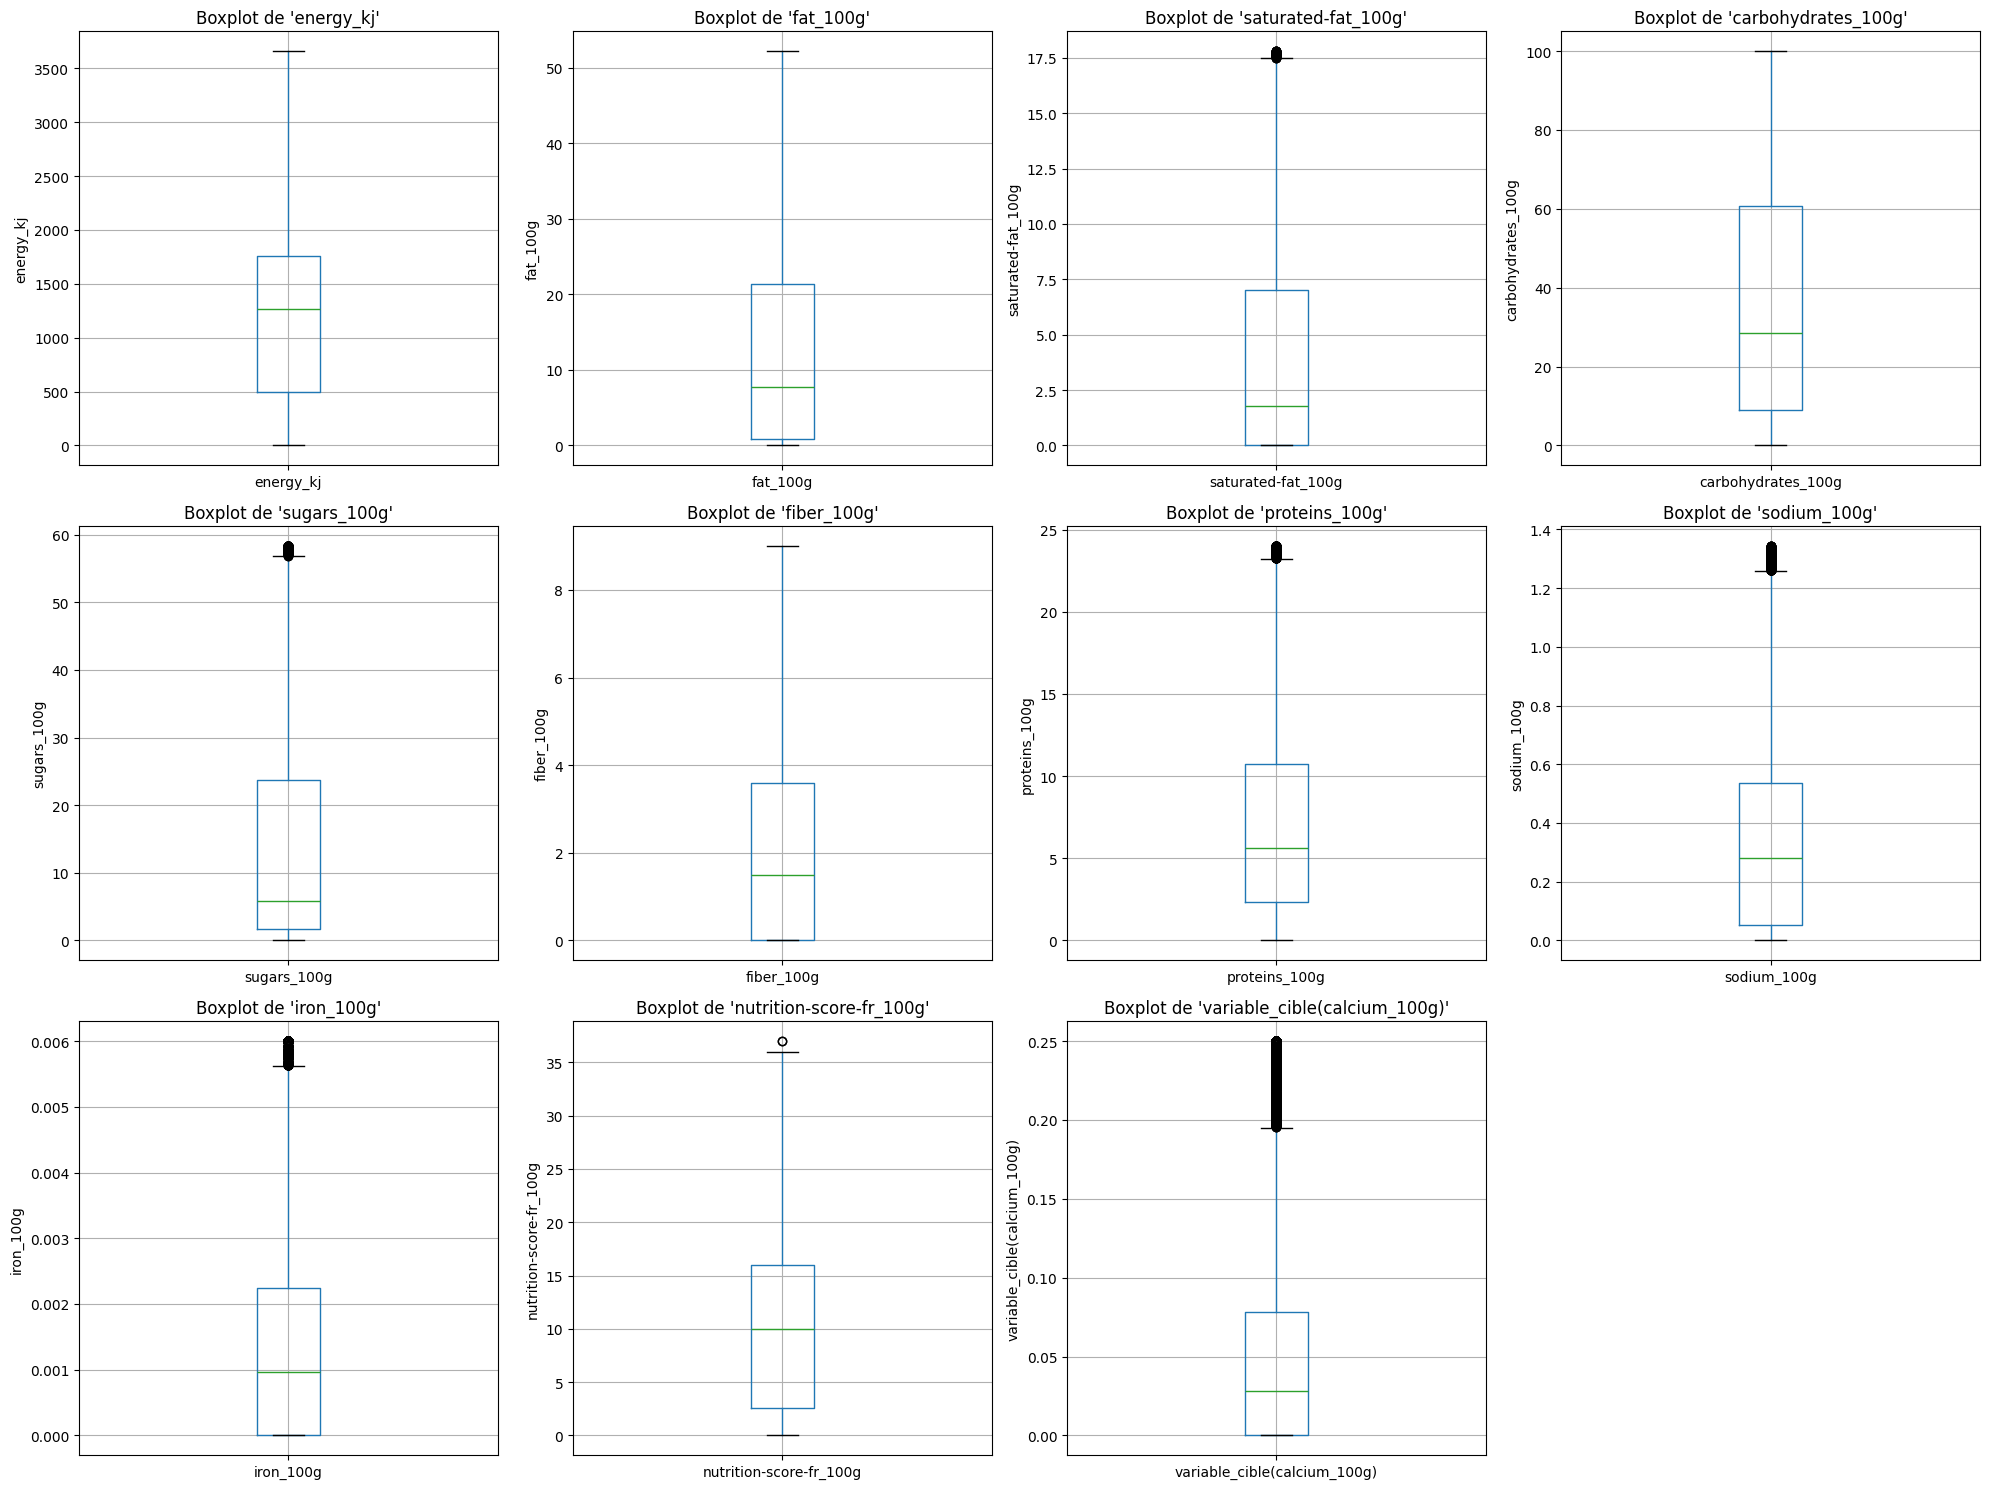

In [17]:
num_vars = len(features_num.columns)
num_cols = 4
num_rows = (num_vars + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize = (20, 5 * num_rows))
axes = axes.flatten()

for i, var in enumerate(features_num.columns) :
    features_num.boxplot(column = var, ax = axes[i])
    axes[i].set_title(f"Boxplot de '{var}'")
    axes[i].set_ylabel(var)

for i in range(num_vars, len(axes)) :
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

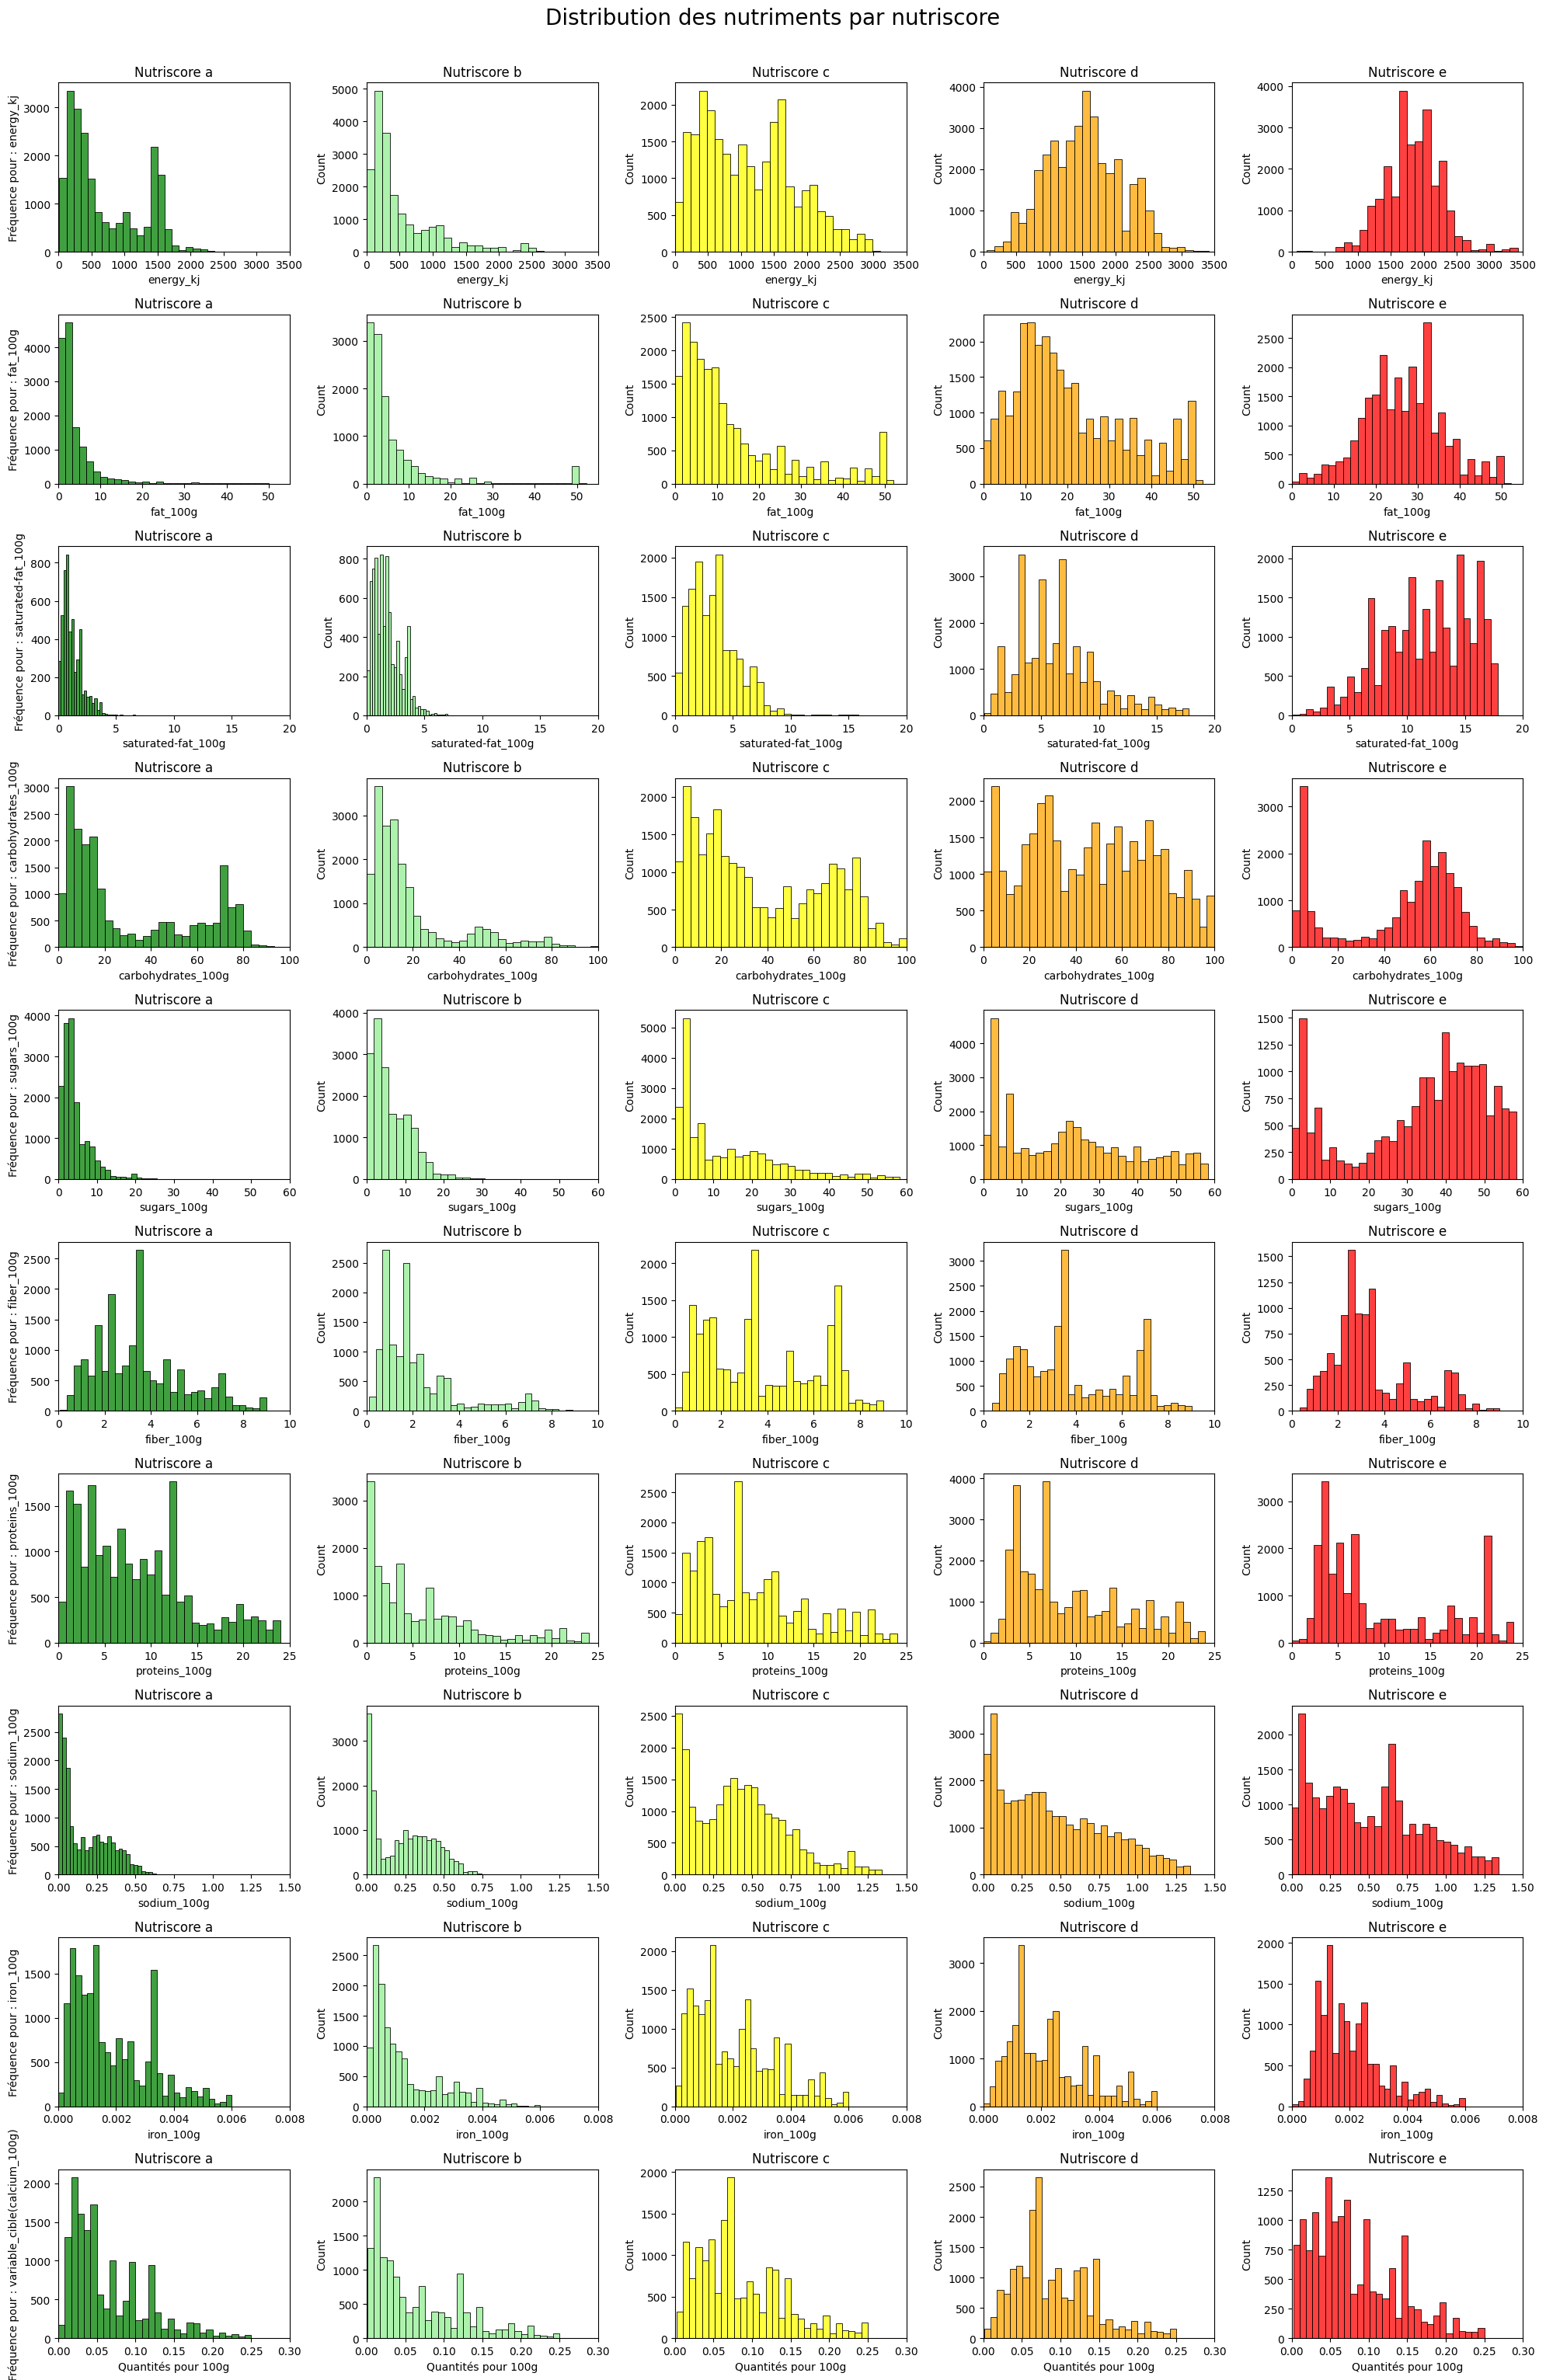

In [18]:
# Définir les nutriments à visualiser
nutriments = ["energy_kj", "fat_100g", "saturated-fat_100g",
            "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g",
            "sodium_100g", "iron_100g", "variable_cible(calcium_100g)"]

# Définir les couleurs pour chaque groupe Nutri-Score
colors = {
    "a": "green",
    "b": "lightgreen",
    "c": "yellow",
    "d": "orange",
    "e": "red"
}

# Créer une figure et des sous-graphiques pour chaque nutriment
fig, axes = plt.subplots(10, 5, figsize=(20, 30), sharex=False, sharey=False)

# Limites pour chaque nutriment basées sur les données
limits = {
    "energy_kj": (0, 3500),
    "fat_100g": (0, 55),
    "saturated-fat_100g": (0, 20),
    "carbohydrates_100g": (0, 100),
    "sugars_100g": (0, 60),
    "fiber_100g": (0, 10),
    "proteins_100g": (0, 25),
    "sodium_100g": (0, 1.5),
    "iron_100g": (0, 0.008),
    "variable_cible(calcium_100g)": (0, 0.30)
}

# Parcourir les nutriments et les groupes Nutri-Score
for i, nutriment in enumerate(nutriments):
    for j, grade in enumerate(["a", "b", "c", "d", "e"]):
        ax = axes[i, j]

        # Filtrer les valeurs nulles ou proches de zéro
        data_filtered = data[data["nutrition_grade_fr"] == grade][nutriment]
        data_filtered = data_filtered[data_filtered > 0]

        sns.histplot(data_filtered, ax=ax, color=colors[grade], kde=False, bins=30)
        ax.set_title(f"Nutriscore {grade}")
        if j == 0:
            ax.set_ylabel("Fréquence pour : " + nutriment)
        if i == 9:
            ax.set_xlabel("Quantités pour 100g")

        # Ajuster les échelles selon les limites calculées
        ax.set_xlim(limits[nutriment])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.suptitle("Distribution des nutriments par nutriscore", y=1.02, fontsize=20)
plt.show()

<u>Conclusions par groupe de Nutri-Score</u> :

- <u>**Nutri-Score A**</u> :
Les produits ayant un Nutri-Score A se caractérisent par des faibles niveaux de calories, graisses saturées, sucres et sodium. Ils sont riches en fibres et contiennent une quantité modérée de protéines.

- <u>**Nutri-Score B**</u> :
Les produits avec un Nutri-Score B ont une légère augmentation des niveaux de calories, graisses saturées, et sucres par rapport au Nutri-Score A, mais restent encore relativement sains. Les niveaux de fibres sont similaires à ceux du Nutri-Score A, et les protéines varient également, mais restent dans des gammes acceptables.

- <u>**Nutri-Score C**</u> :
Le Nutri-Score C montre une augmentation notable dans les niveaux de calories, graisses saturées, et sucres. Les fibres commencent à diminuer, ce qui indique une qualité nutritionnelle moindre. Les protéines restent variables, mais la tendance générale montre une diminution de la qualité nutritionnelle globale par rapport aux Nutri-Scores A et B.

- <u>**Nutri-Score D**</u> :
Les produits classés Nutri-Score D ont des niveaux encore plus élevés de calories, graisses saturées, sucres, et sodium. Les fibres sont considérablement réduites, ce qui indique une diminution importante de la qualité nutritionnelle.

- <u>**Nutri-Score E**</u> :
Les produits avec un Nutri-Score E montrent les plus hauts niveaux de calories, graisses saturées, sucres, et sodium, et les plus faibles niveaux de fibres.

<u>Conclusions par nutriment</u> :
- <u>**Calories (energy_kj)**</u> :
Les produits les plus caloriques se trouvent dans les Nutri-Scores D et E. Les Nutri-Scores A et B contiennent des produits beaucoup moins caloriques.

- <u>**Graisses totales (fat_100g)**</u> :La distribution des graisses totales varie de manière plus marquée selon les Nutri-Scores. Les Nutri-Scores A et B contiennent les plus faibles niveaux de graisses totales, le Nutri-Score C présente une augmentation notable des niveaux de graisses totales et les Nutri-Scores D et E montrent les niveaux les plus élevés de graisses.

- <u>**Graisses saturées (saturated_fat_100g)**</u> :
Les graisses saturées augmentent significativement du Nutri-Score A au Nutri-Score E. Les produits les plus sains (Nutri-Score A) ont des niveaux très faibles de graisses saturées, tandis que ceux avec un Nutri-Score E en ont le plus.

- <u>**Glucides (carbohydrates_100g)**</u> :
La distribution des glucides montre une tendance générale à l'augmentation avec les Nutri-Scores C, D, et E. Les Nutri-Scores A et B ont des glucides modérés, souvent associées à des produits riches en fibres.

- <u>**Sucres (sugars_100g)**</u> :
Les sucres suivent une tendance similaire aux glucides, avec des niveaux beaucoup plus élevés dans les Nutri-Scores D et E, et les niveaux les plus bas dans le Nutri-Score A.

- <u>**Fibres (fiber_100g)**</u> :
Les fibres sont principalement présentes dans les Nutri-Scores A et B, avec une diminution marquée dans les Nutri-Scores C, D, et E. Cela indique que les produits avec des Nutri-Scores élevés (D, E) sont souvent pauvres en fibres.

- <u>**Protéines (proteins_100g)**</u> :
Les protéines sont relativement stables, mais elles sont légèrement plus élevées dans les Nutri-Scores A et B. Les Nutri-Scores C, D, et E montrent une plus grande variabilité, avec une tendance à la diminution de la qualité protéique dans les produits moins sains.

- <u>**Sodium (sodium_100g)**</u> :
Le sodium montre une tendance claire à l'augmentation des Nutri-Scores A à E. Les produits avec un Nutri-Score E ont les niveaux les plus élevés de sodium, ce qui est associé à un risque accru de maladies cardiovasculaires.

- <u>**Fer (iron_100g)**</u> : Les niveaux de fer restent relativement constants à travers les différents Nutri-Scores, indiquant que ce nutriment n'est pas particulièrement influencé par la qualité nutritionnelle globale selon le Nutri-Score.

- <u>**Calcium (calcium_100g)**</u> : Les niveaux de calcium restent relativement constants et similaires à travers les différents groupes de Nutri-Score, avec quelques variations mineures.

<u>Conclusion global</u> :

Les Nutri-Scores A et B sont associés à des produits plus sains, riches en fibres et modérés en énergie, graisses saturées, sucres, et sodium. Les Nutri-Scores D et E contiennent des produits plus riches en énergie, graisses saturées, sucres, et sodium, avec moins de fibres, indiquant une moins bonne qualité nutritionnelle.

### 4.2 : réalisé une analyse bivariée pour étudier les relations entre différentes paires de features.

In [19]:
# Ajout de la variable cible à cat_features
features_cat["variable_cible(calcium_100g)"] = serie_cible

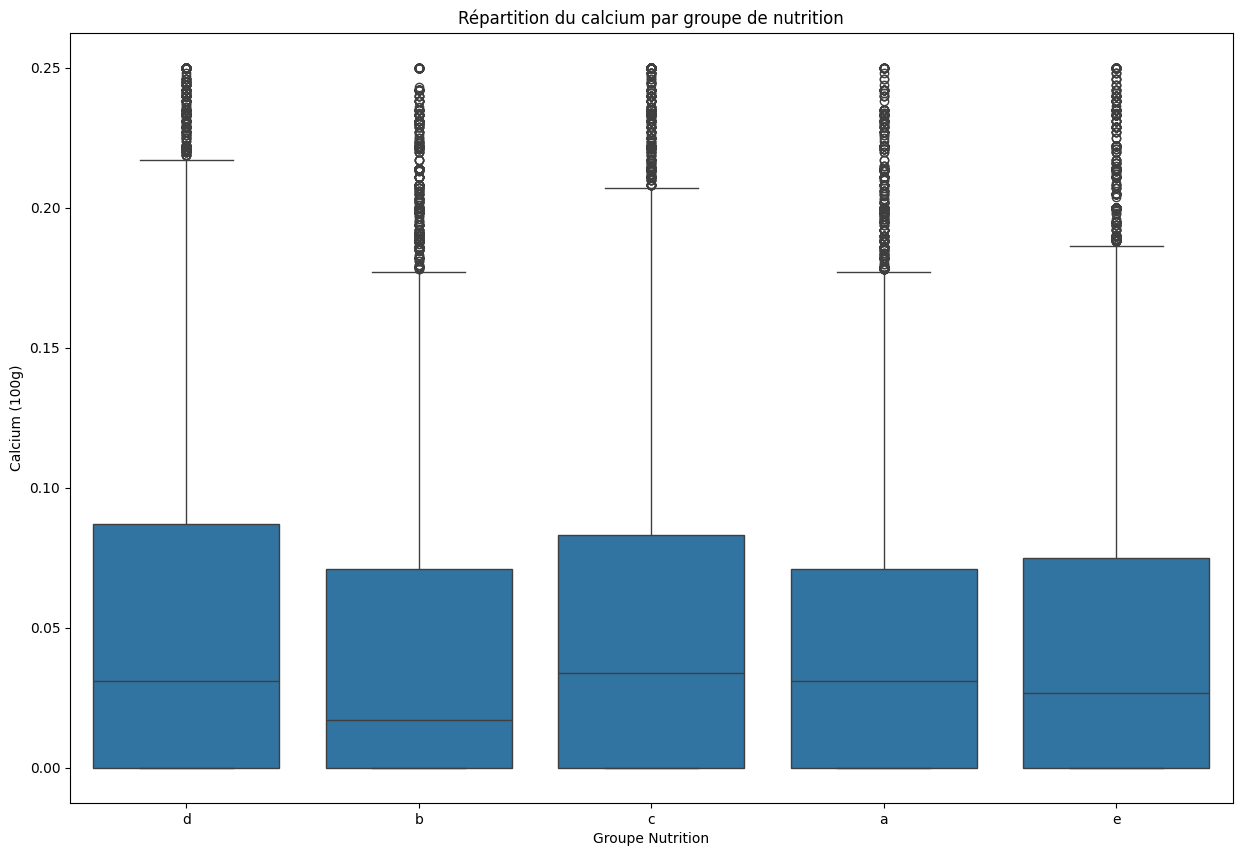

In [20]:
plt.figure(figsize=(15, 10))  # Taille de la figure pour plus de lisibilité
sns.boxplot(x="nutrition_grade_fr", y="variable_cible(calcium_100g)", data=data)

# Ajouter un titre et des labels pour plus de clarté
plt.title("Répartition du calcium par groupe de nutrition")
plt.xlabel("Groupe Nutrition")
plt.ylabel("Calcium (100g)")

# Affichage du graphique
plt.show()

<u>Conclusion pour notre cible le calcium</u> :

Comme on l'a conclu plus haut avec l'histograme, la répartition du calcium ne semble pas avoir de corrélation forte avec les groupes de Nutri-Score. La médiane du calcium est relativement similaire à travers les différents groupes de Nutri-Score, indiquant que le calcium n'est pas un facteur déterminant dans la classification du Nutri-Score. Cependant, il existe une variabilité importante dans chaque groupe, avec des outliers significatifs, ce qui montre que certains produits, même dans les groupes moins sains (comme D et E), peuvent avoir des niveaux élevés de calcium.

In [21]:
# Calcul du test de Shapiro-Wilk
shapiro_test = shapiro(target_cible)

# Affichage des résultats du test de Shapiro-Wilk
print(f"Test de Shapiro-Wilk : W-statistic = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")

# Décision basée sur la p-value
if shapiro_test.pvalue < 0.05 :
    print("La variable cible ne suit pas une distribution normale. Utilisation d'un autre test statistique recommandée")
else :
    print("La variable cible suit une distribution normale. Utilisation du test ANOVA recommandée")

Test de Shapiro-Wilk : W-statistic = 0.00039062091216846007, p-value = 9.436948635914407e-211
La variable cible ne suit pas une distribution normale. Utilisation d'un autre test statistique recommandée


c:\Users\icema\OpenClassrooms\AI_Engineer\.venv3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 261606.
  res = hypotest_fun_out(*samples, **kwds)


- W-statistic = 0.00039062091216846007 :

Cette valeur de La W-statistique est extrêmement proche de zéro, ce qui indique une forte divergence par rapport à une distribution normale.

- p-value = 9.436948635914407e-211 :

La p-value est extrêmement petite, bien en dessous du seuil communément accepté de 0.05. Cette p-value très faible conduit à rejeter l'hypothèse nulle selon laquelle la distribution de la variable cible est normale.

- Conclusion :

La variable cible ne suit pas une distribution normale. Lorsqu'une variable ne suit pas une distribution normale, l'utilisation de tests statistiques qui supposent la normalité, comme l'ANOVA pour comparer les moyennes de plusieurs groupes, n'est généralement pas appropriée.

**Mais le test de Shapiro-Wilk est généralement limité à des échantillons de taille plus réduite, typiquement jusqu'à 5 000 observations. Nous allons utilisé un autre test afin d'avoir une seconde confirmation sur la distribution de nos données**

In [22]:
# Préparation des groupes
group_a = data[data["nutrition_grade_fr"] == "a"]["variable_cible(calcium_100g)"]
group_b = data[data["nutrition_grade_fr"] == "b"]["variable_cible(calcium_100g)"]
group_c = data[data["nutrition_grade_fr"] == "c"]["variable_cible(calcium_100g)"]
group_d = data[data["nutrition_grade_fr"] == "d"]["variable_cible(calcium_100g)"]
group_e = data[data["nutrition_grade_fr"] == "e"]["variable_cible(calcium_100g)"]

# Réalisation du test de Kruskal-Wallis
stat, p_value = kruskal(group_a, group_b, group_c, group_d, group_e)

# Affichage des résultats
print("Statistique de Kruskal-Wallis :", stat)
print("P-value :", p_value)

Statistique de Kruskal-Wallis : 175.8750825499985
P-value : 5.731868141181024e-37


- Conclusion

Le test de Kruskal-Wallis révèle des différences significatives entre les médianes de la variable cible pour différents groupes. Cela suggère que la qualité nutritionnelle a un impact notable sur la variable cible, qui pourrait être le calcium ou un autre nutriment spécifique.

# <center>Etape 5 : Réalisez une analyse multivariée</center>

### 5.1 : Utilisez des techniques de visualisation avancées telles que des matrices de corrélation, des graphiques en nuage de points colorés, ou des graphiques en 3D pour étudier les relations entre plusieurs variables à la fois.

In [23]:
data.isna().sum()

code                            0
product_name                    0
energy_kj                       0
fat_100g                        0
saturated-fat_100g              0
carbohydrates_100g              0
sugars_100g                     0
fiber_100g                      0
proteins_100g                   0
sodium_100g                     0
iron_100g                       0
nutrition_grade_fr              0
nutrition-score-fr_100g         0
variable_cible(calcium_100g)    0
dtype: int64

In [24]:
# Sélection des colonnes catégorielles et numériques
cat_cols = data.select_dtypes(exclude = ["number"]).columns
num_features = data.drop(columns = ["code"] + list(cat_cols))

In [25]:
# Normalisation des caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(num_features)

Objectif : Normaliser les caractéristiques numériques pour que chacune ait une moyenne de zéro et une variance de un.

In [26]:
# Réduction de dimension par PCA
pca = PCA(n_components = min(len(num_features.columns), len(num_features)))
principal_components = pca.fit_transform(scaled_features)

Objectif : Réduire le nombre de dimensions des caractéristiques tout en essayant de conserver le maximum d'information.

In [27]:
# Création d'un DataFrame pour les composantes principales
pca_columns = [f"PC{i + 1}" for i in range(principal_components.shape[1])]
principal_df = pd.DataFrame(data = principal_components, columns = pca_columns)

In [28]:
# Ajout de la colonne cible
principal_df["calcium_100g"] = serie_cible.values

In [29]:
# Concaténation et analyse de corrélation
combined_df = pd.concat([num_features.reset_index(drop = True), principal_df.reset_index(drop = True)], axis = 1)
corr_matrix = combined_df.corr()

Objectif : Concaténer les caractéristiques numériques originales et les composantes principales, et calculer la matrice de corrélation.

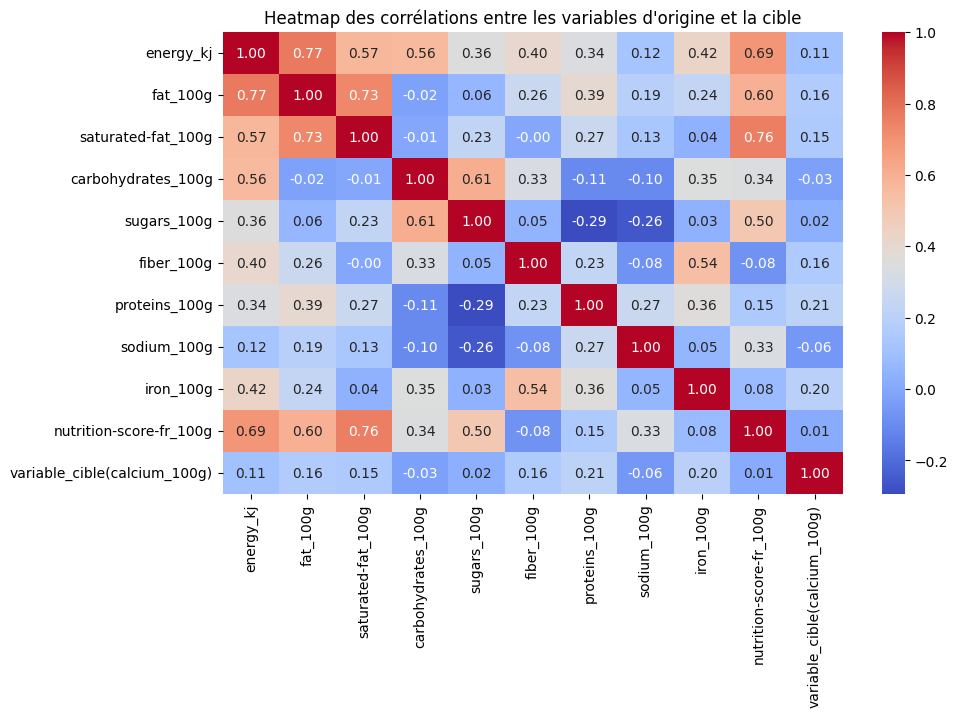

In [30]:
# Visualisation de la matrice de correlation entre les caractéristiques numérique
corr_features_matrix = num_features.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(corr_features_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Heatmap des corrélations entre les variables d'origine et la cible")
plt.show()

Cette visualisation nous permet d'identifier rapidement les variables qui sont fortement corrélées entre elles ou avec la variable cible.

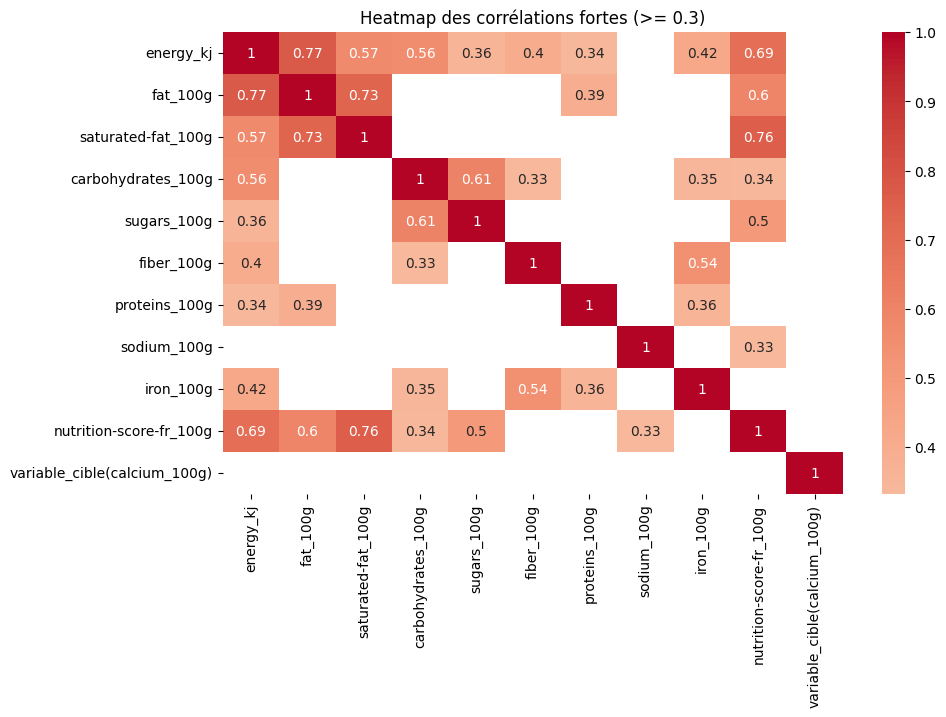

In [31]:
# Focalisation sur les corrélation fortes
corr_features_threshold = 0.3
filtered_features_corr = corr_features_matrix[(corr_features_matrix >= corr_features_threshold) | (corr_features_matrix <= -corr_features_threshold)]

plt.figure(figsize = (10, 6))
sns.heatmap(filtered_features_corr, annot = True, cmap = "coolwarm", center = 0)
plt.title("Heatmap des corrélations fortes (>= 0.3)")
plt.show()

Pour une meilleure visibilité ce graphique nous montre uniquement les correlations fortes entre les variables

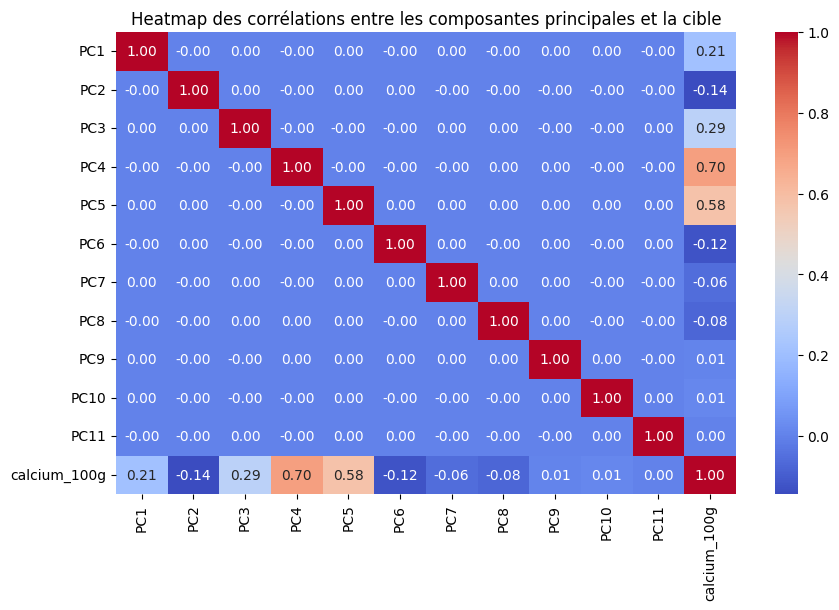

In [32]:
# Visualisation des correlation PCA avec la cible
corr_principal_matrix = principal_df.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(corr_principal_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Heatmap des corrélations entre les composantes principales et la cible")
plt.show()

Cette heatmap nous permet d'observer les relations entre les composantes principales (issues de la PCA) et la variable cible calcium_100g.

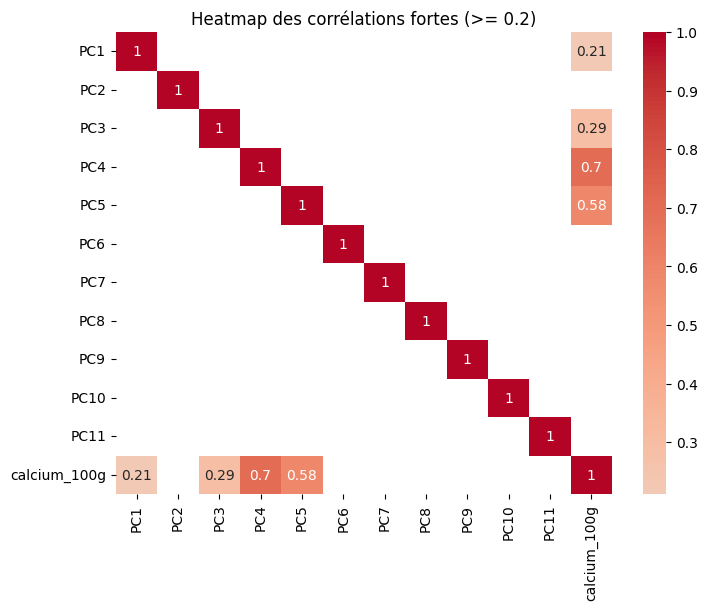

In [33]:
# Focalisation sur les corrélation fortes
corr_principal_matrix = principal_df.corr()

corr_principal_threshold = 0.2
filtered_principal_corr = corr_principal_matrix[(corr_principal_matrix >= corr_principal_threshold) | (corr_principal_matrix <= -corr_principal_threshold)]

plt.figure(figsize = (8, 6))
sns.heatmap(filtered_principal_corr, annot = True, cmap = "coolwarm", center = 0)
plt.title("Heatmap des corrélations fortes (>= 0.2)")
plt.show()

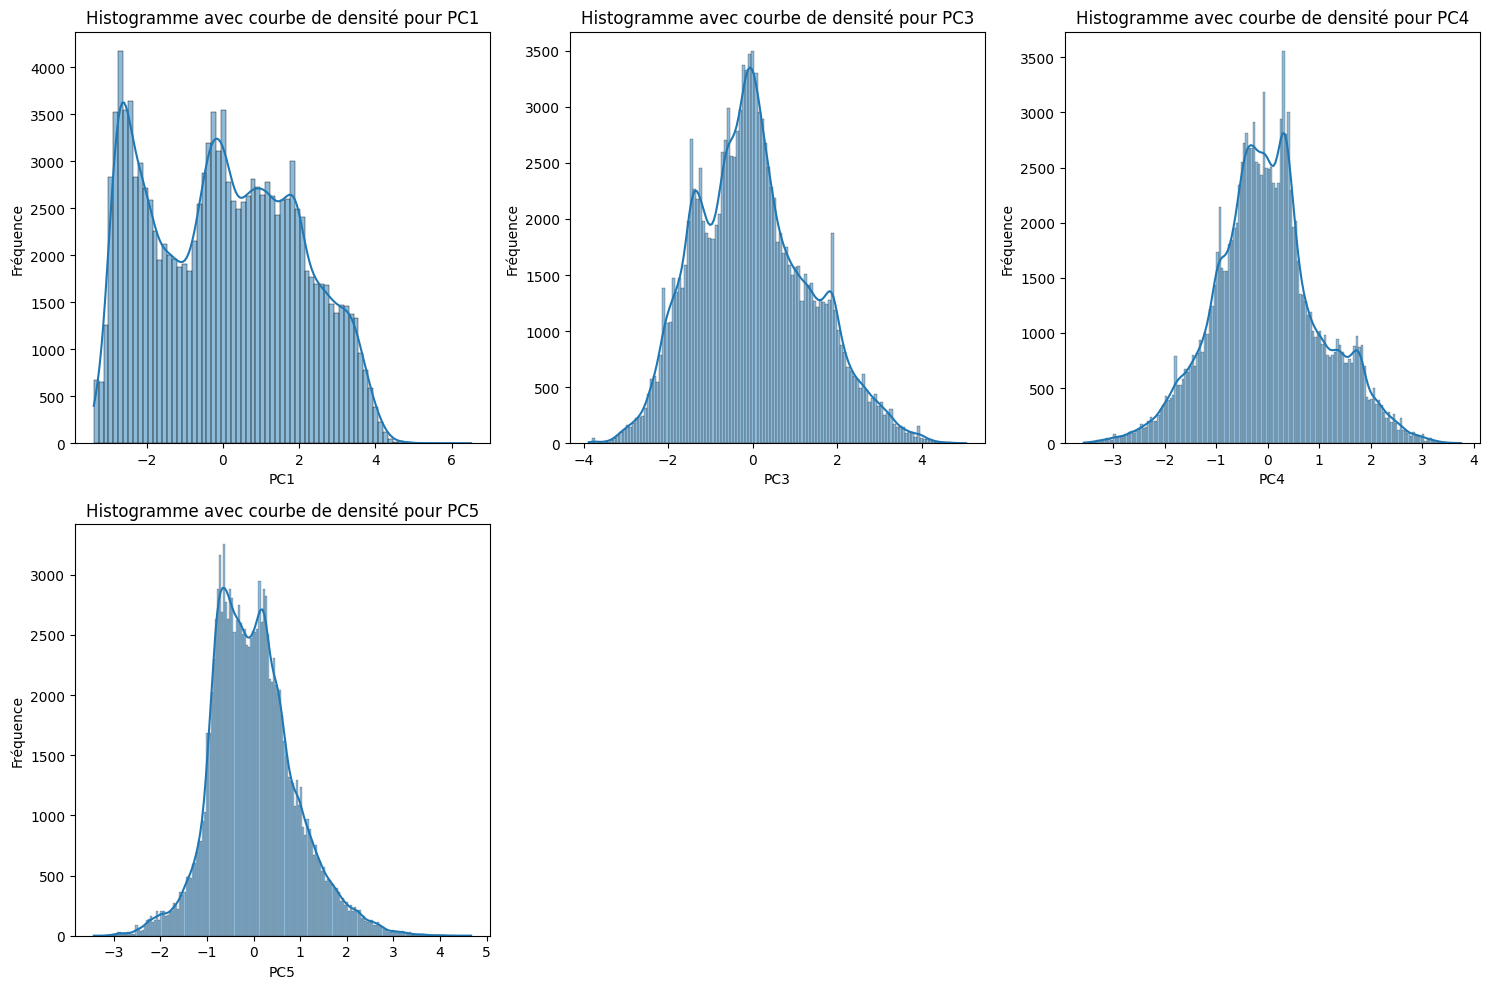

In [34]:
components = ["PC1","PC3","PC4", "PC5"]

num_components = len(components)
num_cols = 3
num_rows = (num_components + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize = ( 15, num_rows * 5))
axes = axes.flatten()

for i, component in enumerate(components) :
    sns.histplot(principal_df[component], kde = True, ax = axes[i])
    axes[i].set_title(f"Histogramme avec courbe de densité pour {component}")
    axes[i].set_xlabel(component)
    axes[i].set_ylabel("Fréquence")
# Suppression des axes vides
for j in range(i + 1, len(axes)) :
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- PC1 : L'histogramme de la première composante principale (PC1) montre une distribution assez asymétrique avec plusieurs pics. Cela suggère que les données projetées sur cette composante sont hétérogènes, possiblement composées de plusieurs sous-groupes. La distribution semble décalée vers la gauche, indiquant une majorité de valeurs négatives ou proches de zéro.

- PC3 : L'histogramme de la troisième composante principale (PC3) montre une distribution plus symétrique, proche d'une distribution normale, avec un pic central marqué autour de zéro. Cela pourrait indiquer que PC3 capte une variance importante des données avec une distribution équilibrée autour de la moyenne.

- PC4 : Pour la quatrième composante principale (PC4), la distribution semble aussi relativement symétrique avec un léger biais à gauche. On observe un pic principal autour de zéro, mais avec quelques fluctuations indiquant la présence de sous-structures ou de variabilité supplémentaire dans cette composante.

- PC5 : Enfin, pour la cinquième composante principale (PC5), la distribution est similaire à celle de PC4, avec une symétrie relative et un pic central autour de zéro. Cette composante semble également capturer une partie de la variance qui présente une distribution proche de la normale.

**Conclusion** :

Les composantes principales PC3, PC4, et PC5 montrent des distributions relativement symétriques, proches d'une distribution normale. PC1, par contre, présente une distribution plus complexe avec plusieurs pics, suggérant une structure plus hétérogène des données dans cette direction. Ces résultats indiquent que les composantes principales capturent différentes facettes de la variabilité des données, certaines plus simples et d'autres plus complexes.

In [35]:
components = ["PC1", "PC3", "PC4", "PC5"]

for i, component in enumerate(components) :
    stat, p_value = kstest(principal_df[component], "norm")
    print(f"{component} - Kolgomorov-Smirnov : Statistique = {stat}, p-value = {p_value}")
    if p_value > 0.05 :
        print(f"{component} est normalement distribué")
    else :
        print(f"{component} n'est pas normalement distribué")

PC1 - Kolgomorov-Smirnov : Statistique = 0.2165941598036073, p-value = 0.0
PC1 n'est pas normalement distribué
PC3 - Kolgomorov-Smirnov : Statistique = 0.09339074217058335, p-value = 0.0
PC3 n'est pas normalement distribué
PC4 - Kolgomorov-Smirnov : Statistique = 0.039900171733098566, p-value = 2.236071262374604e-181
PC4 n'est pas normalement distribué
PC5 - Kolgomorov-Smirnov : Statistique = 0.06908826726005846, p-value = 0.0
PC5 n'est pas normalement distribué


La conclusion globale est que les composantes principales PC1, PC3, PC4 et PC5 ne suivent pas une distribution normale. Compte tenu de la non normalité des distribution je m'oriente vers le Test de Spearman car ce test n'exige pas que les données soient normalement distribuées. Il est donc particulièrement adapté aux données qui montrent des écarts significatifs par rapport à la distribution normale.

In [36]:
num_components = len(components)
num_cols = 3
num_rows = (num_components + num_cols - 1) // num_cols


# Parcours des composantes principales sélectionnées
for i, component in enumerate(components) :
    # Calcul de la corrélation de Spearman avec la cible
    corr, p_value_spearman = spearmanr(principal_df[component], data["variable_cible(calcium_100g)"])
    print(f"Corrélation de Spearman pour {component} et calcium 100g : {corr}, p-value :{p_value_spearman}")

    # Interprétation de la corrélation de Spearman
    if p_value_spearman < 0.05 :
        print(f"La corrélation entre {component} et la cible est significative")
    else :
        print(f"La corrélation entre {component} et la cible n'est pas significative")

Corrélation de Spearman pour PC1 et calcium 100g : 0.17159376490111275, p-value :0.0
La corrélation entre PC1 et la cible est significative
Corrélation de Spearman pour PC3 et calcium 100g : 0.29003305611411057, p-value :0.0
La corrélation entre PC3 et la cible est significative
Corrélation de Spearman pour PC4 et calcium 100g : 0.6703412004890147, p-value :0.0
La corrélation entre PC4 et la cible est significative
Corrélation de Spearman pour PC5 et calcium 100g : 0.5003067599770551, p-value :0.0
La corrélation entre PC5 et la cible est significative


Analyse des Résultats :

- PC1 et calcium_100g

Corrélation: 0.1716

Signification: Statistiquement significative

Interprétation: Bien que significative, la corrélation est relativement faible, ce qui indique que PC1 explique une petite partie de la variabilité de la teneur en calcium.

- PC3 et calcium_100g

Corrélation: 0.2900

Signification: Statistiquement significative

Interprétation: Une corrélation modérée qui suggère que PC3 a une influence plus marquée sur la variation de la teneur en calcium que PC1.

- PC4 et calcium_100g

Corrélation: 0.6703

Signification: Statistiquement significative

Interprétation: Une forte corrélation indiquant que PC4 est très associée avec les variations de la teneur en calcium. PC4 pourrait capturer des aspects des données qui sont particulièrement pertinents pour prédire ou comprendre les variations du calcium.

- PC5 et calcium_100g

Corrélation: 0.5003

Signification: Statistiquement significative

Interprétation: Cette corrélation significative et modérée à forte suggère que PC5 est également un bon prédicteur de la teneur en calcium, bien que moins influente que PC4.

**Toutes les composantes principales testées montrent une corrélation statistiquement significative avec la cible (calcium_100g), ce qui signifie que ces relations ne sont probablement pas dues au hasard ou en tout cas par rapport aux aliments que nous disposons dans notre dataset.**

### 5.2 : Analyse en composante principale (ACP).

In [37]:
# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(num_features)

In [38]:
# Application de l'Analyse en Composantes Principales (PCA)
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

In [39]:
# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.33829884 0.18011516 0.16563609 0.09820431 0.07239715 0.04855933
 0.03745941 0.02898461 0.01996393 0.00737955 0.00300163]


- Concentration de la Variance :

Les premières composantes principales (PC1, PC2, et PC3) capturent une grande partie de la variance totale (environ 68,4% combiné). Cela signifie que les premières composantes principales contiennent la majorité de l'information contenue dans les données.

La première composante principale seule explique déjà environ 33,8% de la variance, ce qui est un pourcentage significatif. Elle pourrait représenter la direction dans laquelle les données varient le plus.

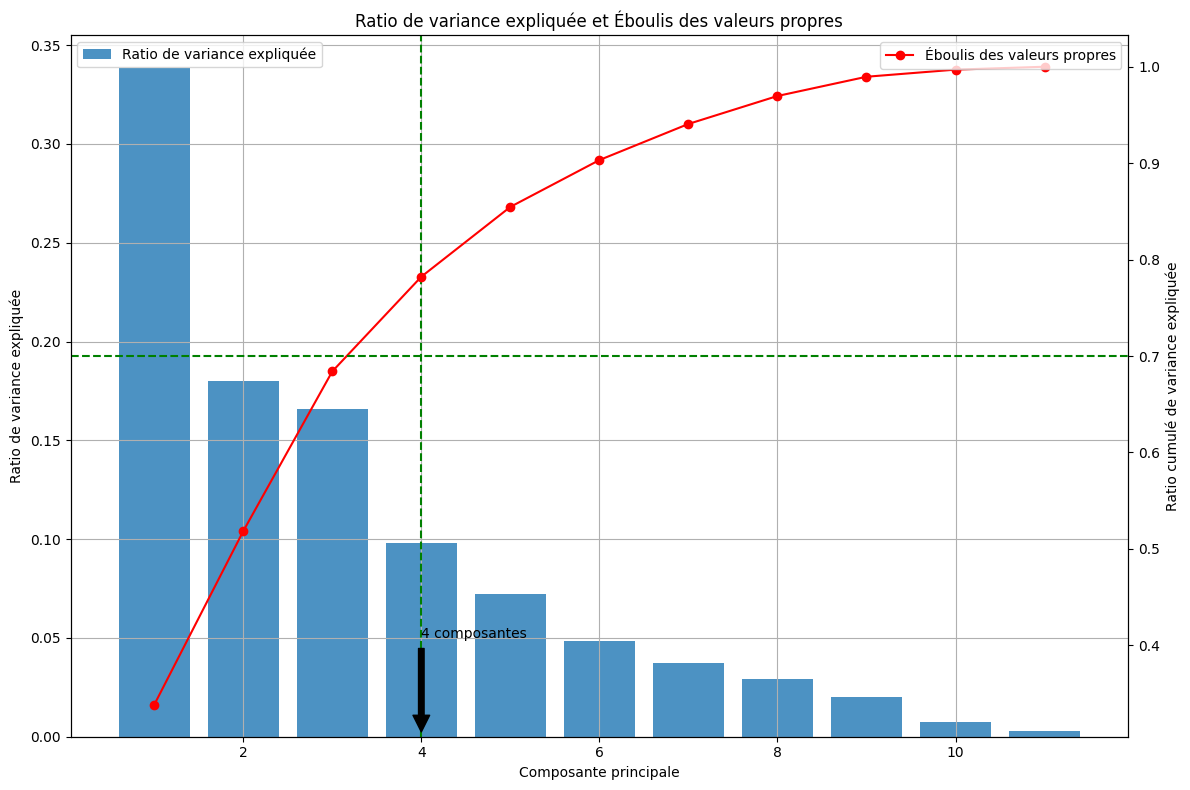

In [40]:
# Calcul de l'ébouli des valeurs propres
cumulative_variance_ratio = np.cumsum(explained_variance)

# Déterminer le nombre de composantes nécessaires pour expliquer 70% de la variance
threshold = 0.7 # Seuil fixé à 70% de la variance totale
num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Graphique du ratio de variance expliquée par composante principale
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.8, align="center", label="Ratio de variance expliquée")
ax1.set_xlabel("Composante principale")
ax1.set_ylabel("Ratio de variance expliquée")
ax1.set_title("Ratio de variance expliquée et Éboulis des valeurs propres")
ax1.grid(True)
ax1.legend(loc="upper left")

# Création d'un axe twin pour le second y-axis partageant le même x-axis
ax2 = ax1.twinx()

# Graphique de l'ébouli des valeurs propres
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker="o", linestyle="-", color="r", label="Éboulis des valeurs propres")
ax2.set_ylabel("Ratio cumulé de variance expliquée")
ax2.legend(loc="upper right")

# Lignes représentant le seuil de 80%
ax1.axvline(num_components, color = "green", linestyle = "--", label = f"{threshold*100}% variance expliquée")
ax2.axhline(threshold, color = "green", linestyle = "--")

# Ajout d'annotations indiquant le seuil
ax1.annotate(f"{num_components} composantes", xy=(num_components, 0), xytext=(num_components, 0.05),
            arrowprops=dict(facecolor="black", shrink=0.05))
ax2.annotate(f"{threshold*100}%", xy=(0, threshold), xytext=(0.5, threshold),
            arrowprops=dict(facecolor="black", shrink=0.05))

# Ajustement de la mise en page pour éviter que les labels ne se chevauchent
plt.tight_layout()

# Afficher le graphique
plt.show()

Ce graphique nous permet de déterminer combien de composantes principales sont nécessaires pour capturer une proportion substantielle de la variance des données d'origine. Dans ce cas, le graphique montre que les quatre premières composantes principales expliquent environ 70% de la variance totale

<Figure size 1500x1500 with 0 Axes>

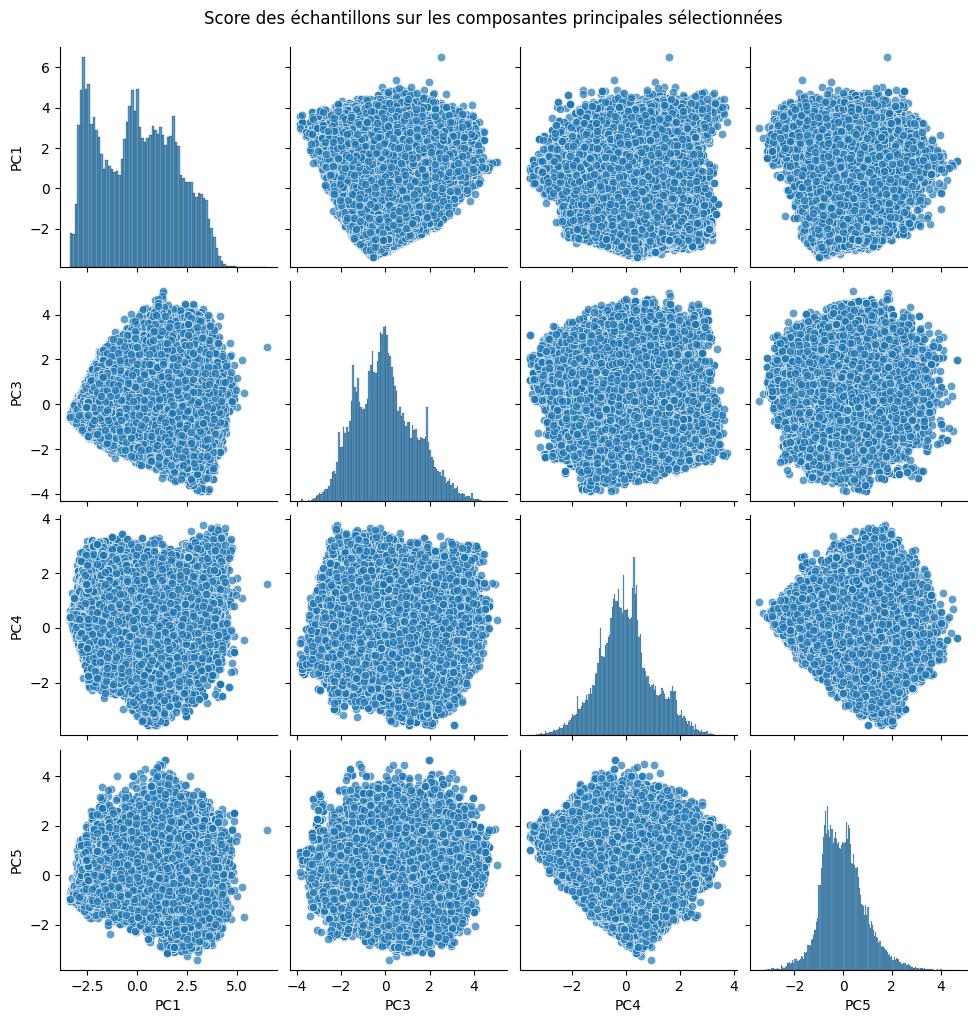

In [41]:
# Matrice de graphes (histogrammes & nuages de points) des composantes principales
pca_df = pd.DataFrame(pca_result, columns = [f"PC{i + 1}" for i in range(pca_result.shape[1])])
pca_df_selected = pca_df[components]

# Coloration des points ** Non Utilisé car long au chargement **
# sns.pairplot(pca_df_selected, hue='PC1', plot_kws={"alpha": 0.7}, palette="viridis")

plt.figure(figsize = (15, 15))
sns.pairplot(pca_df_selected, plot_kws = {"alpha" : 0.7})
plt.suptitle("Score des échantillons sur les composantes principales sélectionnées", y = 1.02)
plt.show()

- Conclusion

Le graphique révèle des sous-structures dans les données et confirme que la PCA a capturé les principales variations de manière efficace. Cela est utile pour réduire la complexité des données tout en permettant une segmentation précise, ce qui pourrait permettre des analyses avancées comme le clustering ou la classification.

___
- Identification de Sous-groupes Potentiels :

Incidence : La présence de plusieurs pics dans la distribution de PC1 suggère que les données peuvent être composées de sous-groupes distincts ou de classes non identifiées. Cela pourrait indiquer que les échantillons ne sont pas homogènes et que des segments spécifiques existent.

Utilité : Cette information est cruciale pour des analyses futures, telles que le clustering, qui peuvent être utilisées pour segmenter les données en groupes distincts. Cela pourrait aussi guider des stratégies de marketing ciblées, des diagnostics médicaux spécifiques, ou d'autres applications où la différenciation entre groupes est essentielle.

- Réduction de la Dimensionnalité :

Incidence : L'indépendance des composantes principales (absence de corrélation) montre que la PCA a bien fonctionné, en capturant des directions de variation distinctes. Cela signifie que les données peuvent être réduites à un nombre plus petit de dimensions sans perdre d'information importante.

Utilité : Une réduction efficace de la dimensionnalité permet de simplifier les modèles d'analyse, de visualisation, ou d'apprentissage automatique, rendant ces processus plus rapides et plus faciles à interpréter. Cela est particulièrement utile dans les contextes où les ressources computationnelles sont limitées ou où la visualisation des données est nécessaire pour la prise de décision.

- Segmentation et Clustering :

Incidence : La variation dans les composantes principales, en particulier PC1, peut être utilisée pour effectuer une segmentation ou un clustering des données. Cette segmentation pourrait révéler des groupes naturels au sein des données, qui peuvent être exploités dans diverses applications.

Utilité : En utilisant les informations de ce graphique, vous pourriez appliquer des algorithmes de clustering (comme K-means ou DBSCAN) pour segmenter les données. Cela peut être utilisé pour des analyses de marché, la détection de fraudes, la personnalisation de l'expérience utilisateur, etc.
___

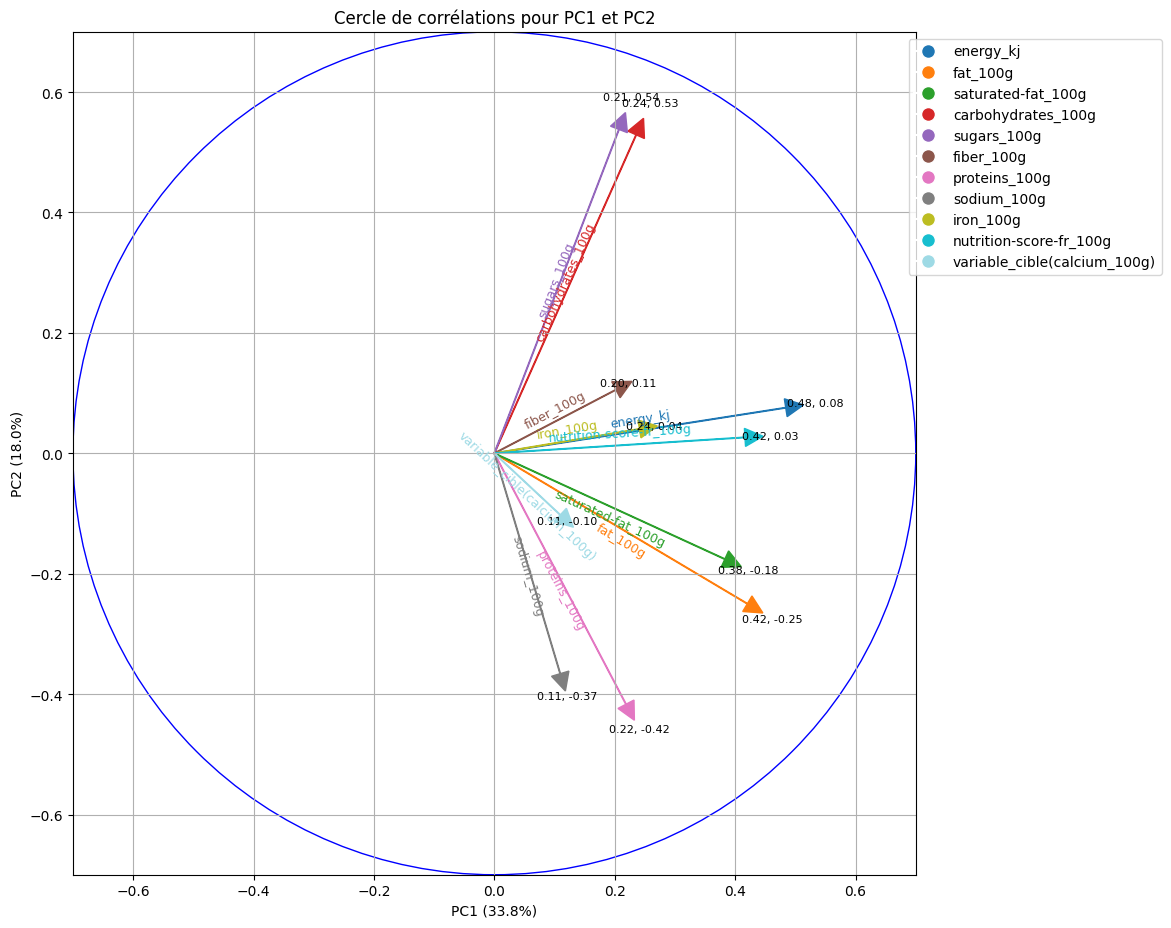

In [42]:
def cercle_corr(pc1, pc2, labels, explained_var, ax=None, figsize=(12, 12)):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    # Définition du cercle unitaire
    circle = plt.Circle((0, 0), 0.7, facecolor="none", edgecolor="b")
    ax.add_artist(circle)

    # Coloration des flèches pour chaque variable + annotations des valeurs à l'extrémité
    colors = plt.cm.tab20(np.linspace(0, 1, len(labels)))
    for i, (label, color) in enumerate(zip(labels, colors)):
        end_x = pc1[i]  # Coordonnée finale en x de la flèche
        end_y = pc2[i]  # Coordonnée finale en y de la flèche
        ax.arrow(0, 0, end_x, end_y, head_width=0.03, head_length=0.03, fc=color, ec=color)
        value_str = f'{end_x:.2f}, {end_y:.2f}'  # Format des valeurs des composantes principales
        ax.text(end_x * 1.1, end_y * 1.1, value_str, color="black", ha="center", va="center", fontsize=8)

        # Ajout du nom des variables le long de chaque flèche
        angle = np.arctan2(end_y, end_x)  # Calcul de l'angle de la flèche
        angle_degrees = np.degrees(angle)
        if angle_degrees > 90:
            angle_degrees -= 180
        elif angle_degrees < -90:
            angle_degrees += 180

        # Positionnement du texte
        text_x = end_x * 0.5
        text_y = end_y * 0.5
        offset = 0.02  # Décalage pour éviter le chevauchement
        if end_y >= 0:
            text_y += offset
        else:
            text_y -= offset

        ax.text(text_x, text_y, label, color=color, ha="center", va="center", fontsize=9, rotation=angle_degrees)

    # Légende pour les variables
    legend_handles = [plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=color, markersize=10) for color in colors]
    ax.legend(legend_handles, labels, loc="upper right", bbox_to_anchor=(1.3, 1))

    # Ajustements des limites et étiquettes des axes
    ax.set_aspect("equal", adjustable="box")  # Assurer que le cercle est parfaitement rond
    ax.set_xlim(-0.7, 0.7)
    ax.set_ylim(-0.7, 0.7)
    ax.set_xlabel(f"PC1 ({explained_var[0]*100:.1f}%)")
    ax.set_ylabel(f"PC2 ({explained_var[1]*100:.1f}%)")
    ax.set_title("Cercle de corrélations pour PC1 et PC2")
    ax.grid(True)

# Variables à utiliser pour le cercle de corrélations
pc1 = pca.components_[0]
pc2 = pca.components_[1]
labels = num_features.columns
explained_var = explained_variance[:2]

# Création du graphique
plt.figure(figsize=(12, 12))
cercle_corr(pc1, pc2, labels, explained_var, plt.gca())

plt.tight_layout()
plt.show()

In [43]:
# Forçons la réalisation de l'ANOVA

# Chargement des données
data = pd.read_excel("P3_data.xlsx")
target_cible = pd.read_excel("P3_target_cible.xlsx")

# Fusionner les données sur la colonne "code"
merged_data = pd.merge(data, target_cible, on="code")

# Création d'un modèle de régression linéaire où "calcium_100g_y" est la variable dépendante
# et 'nutrition_grade_fr' est la variable indépendante (catégorielle)
model = smf.ols("calcium_100g_y ~ C(nutrition_grade_fr)", data=merged_data).fit()

# Résumé du modèle OLS
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats de l'ANOVA via OLS
print(anova_table)
print(model.summary())

                           sum_sq        df          F        PR(>F)
C(nutrition_grade_fr)    0.880935       4.0  67.064833  8.663080e-57
Residual               430.078122  130966.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:         calcium_100g_y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     67.06
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           8.66e-57
Time:                        15:19:32   Log-Likelihood:             1.8866e+05
No. Observations:              130971   AIC:                        -3.773e+05
Df Residuals:                  130966   BIC:                        -3.773e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
   

___
**Récapitulatif**:

- Shapiro-Wilk :

Le test de Shapiro-Wilk est utilisé pour vérifier si les données suivent une distribution normale.

La valeur p extrêmement faible (bien en dessous de 0,05) indique que la variable cible (calcium_100g) ne suit pas une distribution normale.

Cela signifie que l'utilisation de tests paramétriques comme l'ANOVA pourrait ne pas être appropriée.

- Kruskal-Wallis :

Le test de Kruskal-Wallis est une alternative non paramétrique à l'ANOVA qui est utilisé lorsque les données ne sont pas normalement distribuées.

La valeur p très faible indique qu'il existe une différence significative entre les groupes définis par nutrition_grade_fr en termes de calcium_100g.

Cela confirme que les groupes ne sont pas similaires et que le nutrition_grade_fr a un effet significatif sur les niveaux de calcium.

- Corrélation de Spearman :

Le test de corrélation de Spearman évalue la relation entre les composantes principales (PC1, PC3, PC4, PC5) et calcium_100g.

Les résultats montrent que toutes les composantes principales testées ont une corrélation significative avec la variable calcium, ce qui signifie que ces composantes principales capturent des informations importantes qui sont liées aux niveaux de calcium.

- ANOVA (Cette utilisation de l'ANOVA n'est pas pertinante avec ces données)

Les résultats de l'OLS confirment le test de Kruskal-Wallis, à savoir qu'il existe des différences significatives entre les groupes nutrition_grade_fr en termes de calcium. Cependant, l'effet de ces différences est très faible, comme l'indique le R-squared.
___

A la finalité les variables qui doivent impérativement être rempli dans la future application sont :
- Energy kj
- Carbohydrates
- sugars
- saturated-fat
- fat
- proteins
- sodium

Ces informations permetterons de définir le nutriscore A, B, C, D et E, l'ajout de nouvelle variables comme les fibres, le calcium permetterai de compléter l'information nutritionnelles.

# <center>Respect du RGPD</center>

- Licéité, loyauté et transparence : Les données doivent être traitées de manière légale, équitable et transparente vis-à-vis des personnes concernées.

C'est le cas, l'importation des données provient d'une base de données publique et disponible

- Limitation des finalités : Les données doivent être collectées pour des finalités spécifiques, explicites et légitimes, et ne doivent pas être traitées ultérieurement d'une manière incompatible avec ces finalités.

Nous proposons une solution pour ajouter des informations dans la base de données d'Open Food Fact avec un minimum de champs a remplir

- Minimisation des données : Les données collectées doivent être adéquates, pertinentes et limitées à ce qui est nécessaire au regard des finalités pour lesquelles elles sont traitées.

Les liste est réduite au strict minimum, mais évolutive si besoin par l'ajout de nouvelle variables


- Exactitude : Les données doivent être exactes et, si nécessaire, mises à jour. Toutes les mesures raisonnables doivent être prises pour que les données inexactes soient effacées ou rectifiées sans délai.

Nous avons effectué un nettoyage des données afin de supprimer les differentes erreurs par exemple : les valeurs négative ou encore les valeurs impossibles

- Limitation de la conservation : Les données ne doivent être conservées sous une forme permettant l'identification des personnes concernées que pendant la durée nécessaire au regard des finalités pour lesquelles elles sont traitées.

Il n'y a aucune informations permettant l'identification d'un personne, la finalité de ce travail est de fournir uniquement des information nutritionnelles.